In [9]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import matplotlib.pyplot as plt

import mpl_extra.treemap as tr

In [11]:
df = pd.read_csv('../data/G20.csv')
df.head()

,region,country,gdp_mil_usd,hdi,econ_classification,hemisphere
0,Africa,South Africa,384315,0.629,Developing,Southern
1,North America,United States,15684750,0.937,Advanced,Northern
2,North America,Canada,1819081,0.911,Advanced,Northern
3,North America,Mexico,1177116,0.775,Developing,Northern
4,South America,Brazil,2395968,0.730,Developing,Southern


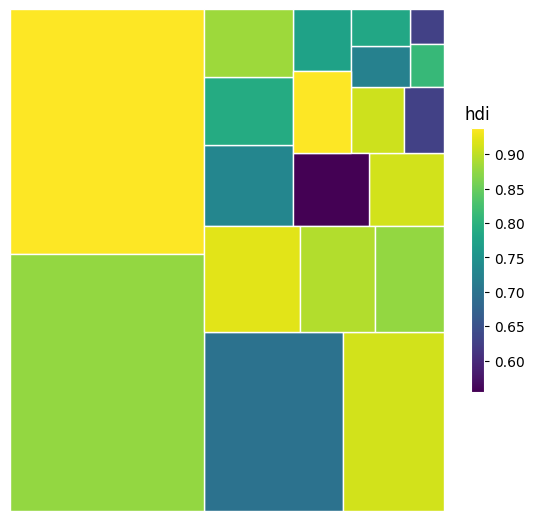

In [12]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.156))

trc = tr.treemap(
    ax, df, area='gdp_mil_usd', fill='hdi', 
    rectprops={'ec':'w', 'lw':1},
                )
ax.axis('off')

cb = fig.colorbar(trc.mappable, ax=ax, shrink=0.5)

cb.ax.set_title('hdi')
cb.outline.set_edgecolor('w')

plt.show()

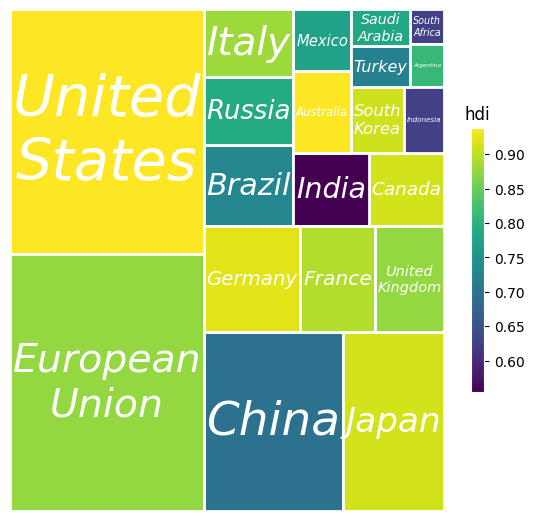

In [13]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.156))

trc = tr.treemap(
    ax, df, area='gdp_mil_usd', fill='hdi', labels='country',
    rectprops={'ec':'w', 'lw':2},
    textprops={'c':'w', 'fontstyle':'italic','wrap':True},
                )
ax.axis('off')

cb = fig.colorbar(trc.mappable, ax=ax, shrink=0.5)

cb.ax.set_title('hdi')
cb.outline.set_edgecolor('w')

plt.show()

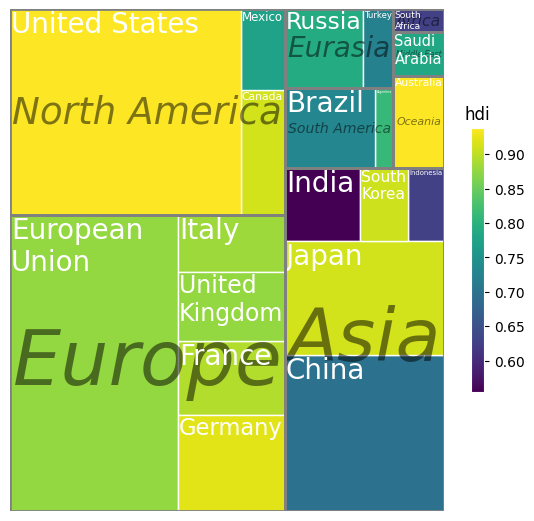

In [14]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.156))

trc = tr.treemap(ax, df, area='gdp_mil_usd', fill='hdi', labels='country',
           levels=['region', 'country'],
           textprops={'c':'w', 'wrap':True,
                      'place':'top left', 'max_fontsize':20},
           rectprops={'ec':'w'},
           subgroup_rectprops={'region':{'ec':'grey', 'lw':2, 'fill':False,
                                         'zorder':5}},
           subgroup_textprops={'region':{'c':'k', 'alpha':0.5, 'fontstyle':'italic'}},
           )

ax.axis('off')

cb = fig.colorbar(trc.mappable, ax=ax, shrink=0.5)

cb.ax.set_title('hdi')
cb.outline.set_edgecolor('w')

plt.show()

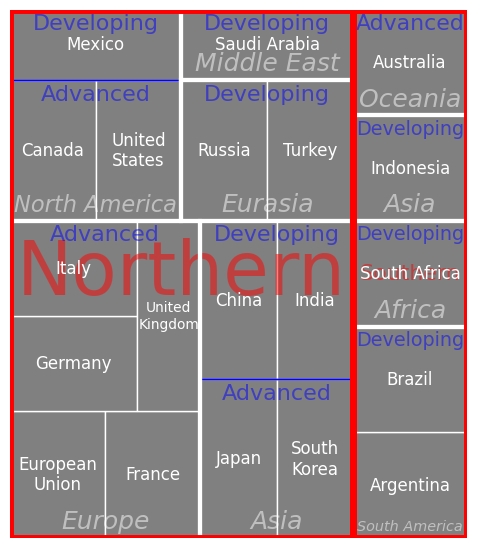

In [15]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.156))

tr.treemap(ax, df, area=1, labels='country', 
           levels=['hemisphere', 'region', 'econ_classification', 'country'],
           textprops=dict(c='w', wrap=True, max_fontsize=12),
           rectprops=dict(ec='w', fc='grey'),
           subgroup_textprops={'hemisphere':dict(c='r', alpha=0.5),
                               'region':dict(c='w', alpha=0.5, fontstyle='italic',
                                             place='bottom center',
                                             max_fontsize=18),
                               'econ_classification':dict(place='top center', c='b', 
                                                          alpha=0.5, pady=3, padx=2,
                                                          max_fontsize=16),},
           subgroup_rectprops={'hemisphere':dict(ec='r', lw=5, zorder=5, fill=False),
                               'region':dict(ec='w', lw=3, fill=False, zorder=4),
                               'econ_classification':dict(ec='b', zorder=3, fill=False)}
           )

ax.axis('off')

plt.show()

Text(0.9, 0.12, "The area of each tile represents the country's GDP as a \n          proportion of all countries in that hemisphere")

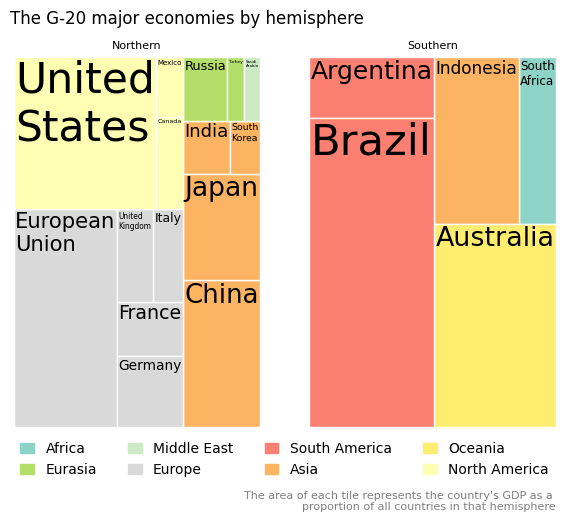

In [16]:
southern = df.query('hemisphere == "Southern"')
northern = df.query('hemisphere == "Northern"')
cmap = tr.get_colormap('Set3', df['region'])

fig, axes = plt.subplots(1, 2, figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.5))

trc = []
for i, data in enumerate([northern, southern]):
    t = tr.treemap(
        axes[i], data, area='gdp_mil_usd', fill='region', labels='country',
        levels=['region', 'country'], cmap=cmap,
        rectprops=dict(ec='w'),
        textprops=dict(c='k', wrap=True, place='top left'),
        subgroup_rectprops=dict(region={}),
    )
    axes[i].set_title(data['hemisphere'].iloc[0], fontsize=8)
    axes[i].axis('off')
    trc.append(t)
    

handles = sorted(trc[0].handles['region'] + trc[1].handles['region'], 
                 key=lambda x: (x.get_ec(),x.get_label()))
legend = fig.legend(handles=[handles[i] for i in range(0, len(handles), 2)],
          ncol=4, loc='lower left', bbox_to_anchor=(0.117,0.15, 0.79, 0.4),
          handlelength=1, mode='expand', frameon=False)
fig.suptitle('The G-20 major economies by hemisphere', x=0.12, y=0.835, ha='left')
fig.text(0.9, 0.12, '''The area of each tile represents the country's GDP as a 
          proportion of all countries in that hemisphere''',
        ha='right', fontsize=8, color='grey')

Text(0.9, 0.11, "The area of each tile represents the country's GDP as a \n          proportion of all countries in that hemisphere")

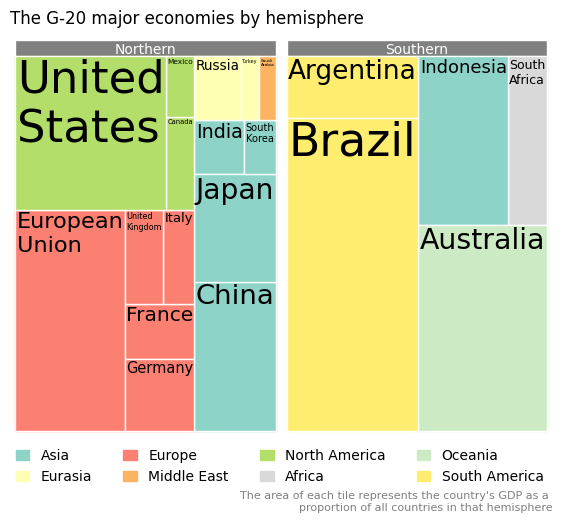

In [17]:
fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.5))

trc = tr.treemap(
    ax, df, area='gdp_mil_usd', fill='region', labels='country', norm_y=50,
    levels=['hemisphere', 'region', 'country'], cmap='Set3', split=True,
    rectprops=dict(ec='w'),
    textprops=dict(c='k', wrap=True, place='top left'),
    subgroup_rectprops=dict(region={'pad':(0,0,2,0)},
                            hemisphere={'ec':'w', 'fc':'grey'}),
    subgroup_textprops=dict(hemisphere={'place':'top center', 'max_fontsize':10,
                                       'color':'w'})
)

ax.axis('off')

ax.set_title('The G-20 major economies by hemisphere', x=0, ha='left')

legend = fig.legend(handles=trc.handles['region'],
          ncol=4, loc='lower left', bbox_to_anchor=(0.115,0.13, 0.79, 0.4),
          handlelength=1, mode='expand', frameon=False)

fig.text(0.9, 0.11, '''The area of each tile represents the country's GDP as a 
          proportion of all countries in that hemisphere''',
        ha='right', fontsize=8, color='grey')

In [18]:
df = pd.read_csv('../data/Fig2-2-7.csv')
df.head()

,一级,二级,申请量/项
0,运算模块,定位,15
1,运算模块,多路径误差校正,4
2,运算模块,定时,1
3,运算模块,授时,1
4,基带模块,观测测量值,8


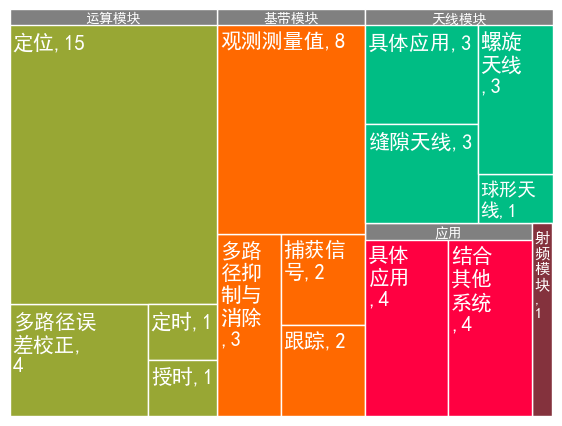

In [19]:
colors = dict(zip(['运算模块','基带模块', '天线模块', '应用', '射频模块'],
                  ['#98A734','#FF6900','#00BD84','#FF0041','#84323D']))
labels = [a + ',' + str(b) for a, b in zip(df['二级'].fillna('射频模块'), df['申请量/项'])]

fig, ax = plt.subplots(figsize=(7,7), dpi=100, subplot_kw=dict(aspect=1.5))

trc = tr.treemap(
    ax, df, area='申请量/项', levels=['一级', '二级'], norm_y=50, top=True,
    fill='一级', labels=labels,
    cmap=colors,
    rectprops=dict(ec='w', pad=(0,0,0,2)),
    textprops=dict(fontfamily='SimHei', wrap=True, place='top left', grow=True,
                  max_fontsize=15, color='w', pady=3, padx=2),
    subgroup_rectprops={'一级':dict(ec='w', fc='grey')},
    subgroup_textprops={'一级':dict(place='top center', max_fontsize=10, 
                                  fontfamily='SimHei', c='w')},
)

ax.axis('off')
trc.texts['一级'][2].set_text('')